In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
#from method2.functions import train_test
import warnings
warnings.filterwarnings('ignore')
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_labels = train.pop('SalePrice')
data = pd.concat([train, test], keys=['train', 'test'])
print(data.columns) # check column decorations
print('rows:', data.shape[0], ', columns:', data.shape[1]) # count rows of total dataset
print('rows in train dataset:', train.shape[0])
print('rows in test dataset:', test.shape[0])

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive


# DATA EXPLORATION

In [2]:
print(train_labels.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'House Sales Price Distribution')

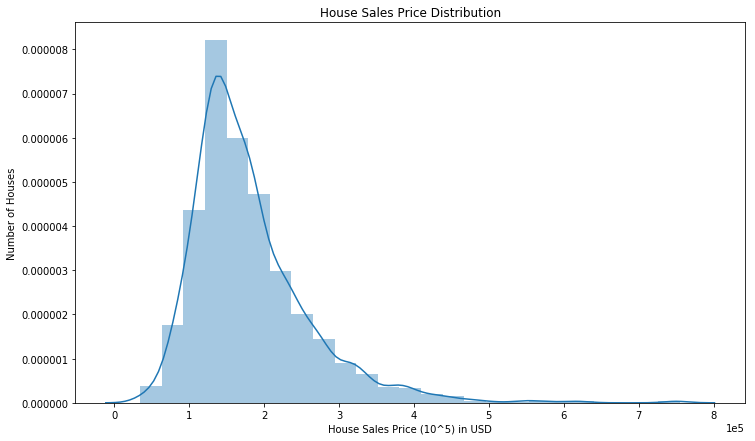

In [5]:
# Distribution curve for Sale Price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.distplot(train_labels, bins = 25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("House Sales Price (10^5) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")

(array([  4.,   1.,   0.,   5.,   7.,   6.,  26.,  45.,  47., 114., 165.,
        215., 172., 199., 119., 109.,  88.,  52.,  35.,  26.,  12.,   5.,
          4.,   2.,   2.]),
 array([10.46024211, 10.58321134, 10.70618058, 10.82914982, 10.95211906,
        11.07508829, 11.19805753, 11.32102677, 11.443996  , 11.56696524,
        11.68993448, 11.81290371, 11.93587295, 12.05884219, 12.18181142,
        12.30478066, 12.4277499 , 12.55071913, 12.67368837, 12.79665761,
        12.91962684, 13.04259608, 13.16556532, 13.28853455, 13.41150379,
        13.53447303]),
 <a list of 25 Patch objects>)

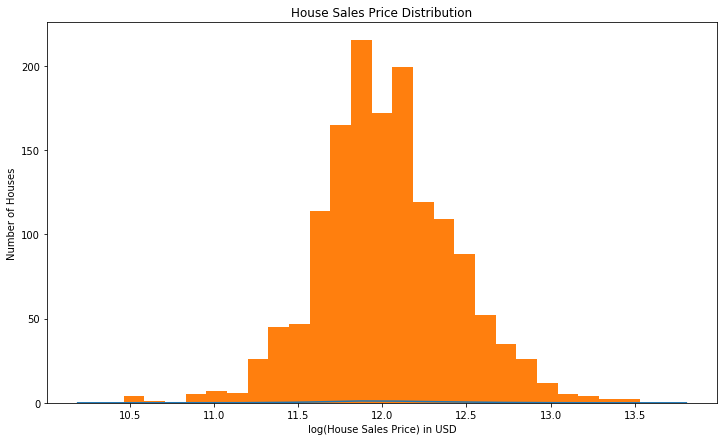

In [6]:
#Taking log of Sales Price
plt.figure(figsize=(12,7))
sns.distplot(np.log(train_labels), bins = 25)
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")
plt.hist(np.log(train_labels), bins = 25)

In [7]:
train["SalePrice"]=train_labels
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [8]:
corr = numeric_features.corr()

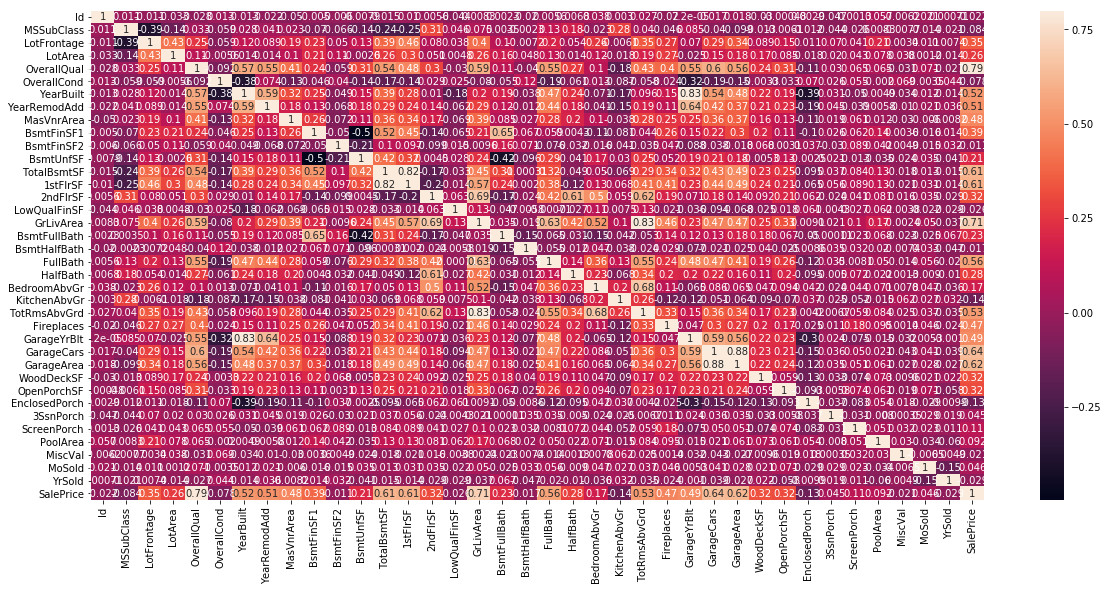

In [9]:
#correlation matrix for getting the impact of each feature on target variable
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True);

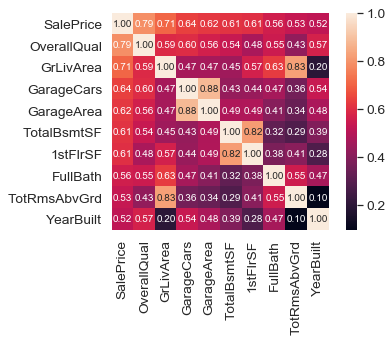

In [10]:
# The Top 10 features which has greatest impact on target variable. 
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# We can derive here that :
1) OverallQual, GrLivArea and TotalBsmtSF have strong correlation with SalePrice.

2) GarageCars and GarageArea not only have strong correlation with SalePrice, but also have strong correlation with each other. It is easy to imagine that the number of cars store in garage is strong depends on the area of garage, which means that one of them is enough to represent the relationship between SalePrice and Garage.... Here, we choose GarageCars, since it has slightly higher score (Same for other Garage... features).

3) The relationship between TotalBsmtSF and 1stFlrSF is almost same as GarageCars and GarageArea, we can also choose one of them.

4) According to the data description and the graph here, we find that GrLivArea and TotRmsAbvGrd are the similar features too. Their correlation is 0.83, and the GrLivArea represents the “Above grade (ground) living area square feet”, while TotRmsAbvGrd indicates “Total rooms above grade (does not include bathrooms)”.

5) Another thing is that the FullBath and YearBuilt do not have siginificantly strong correlation with SalePrice.

C:\Users\Aditya Saha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


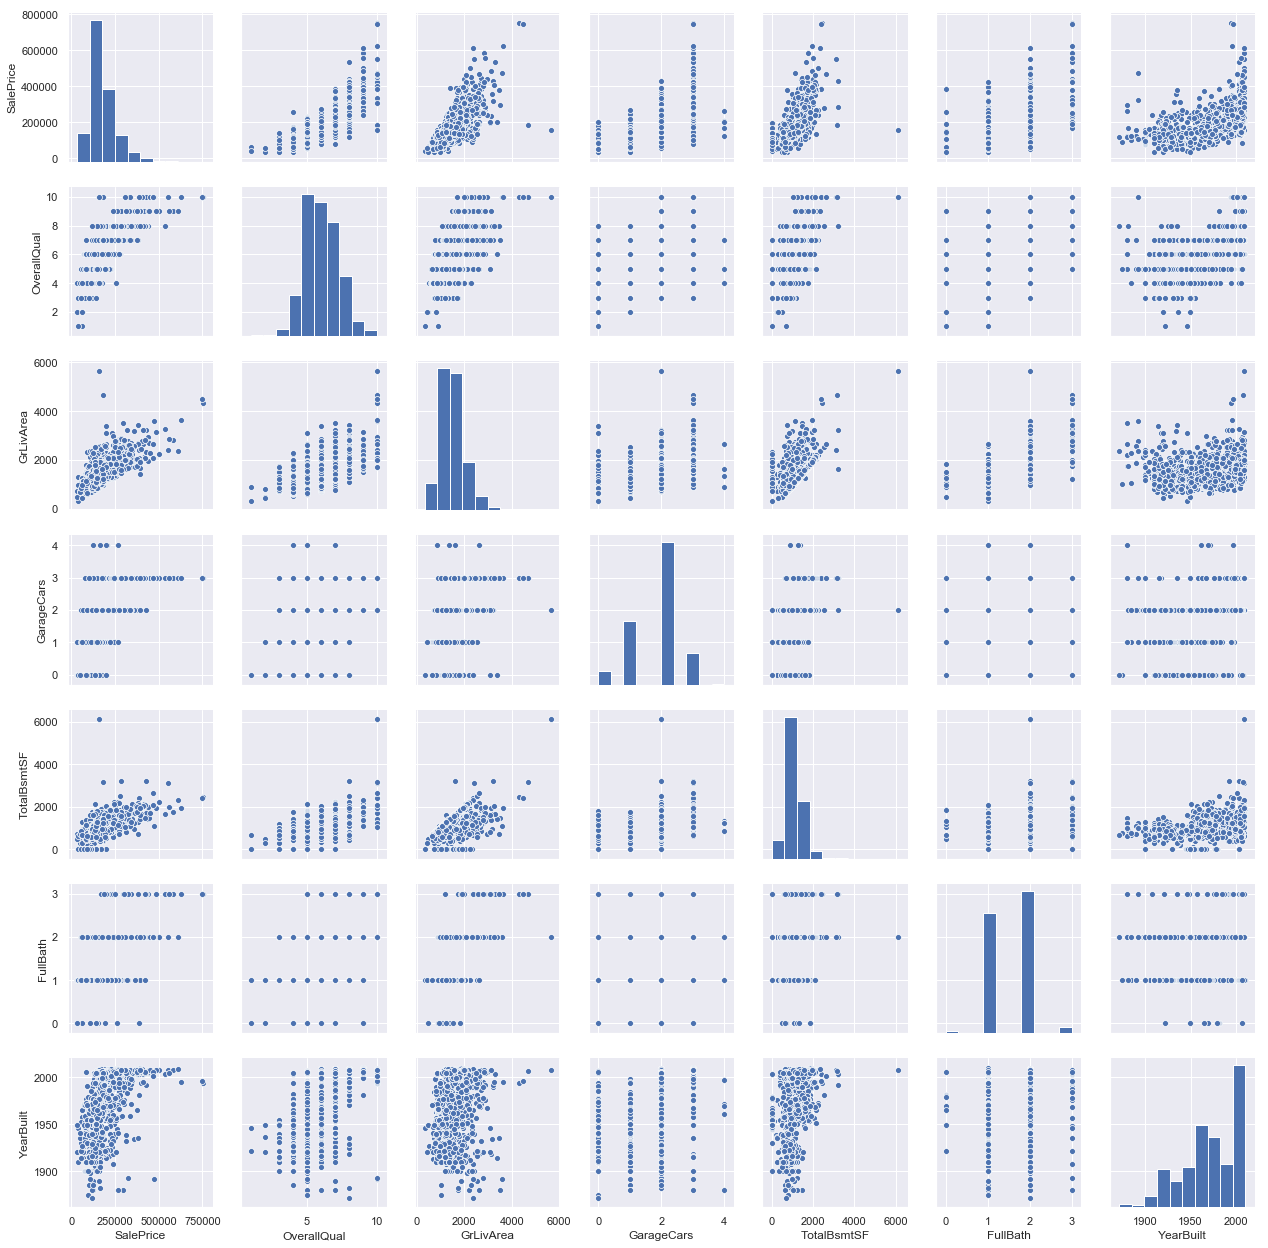

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


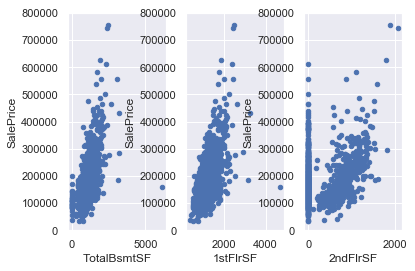

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
data_total = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data_total.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000), ax=ax1)
data1 = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
data1.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)
data2 = pd.concat([train['SalePrice'], train['2ndFlrSF']], axis=1)
data2.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)
plt.show()

In [13]:
train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
train['1stFlrSF'] = train['1stFlrSF'].fillna(0)
train['2ndFlrSF'] = train['2ndFlrSF'].fillna(0)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
train.drop(['GarageArea'], axis=1, inplace=True)

In [14]:
train.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF',
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Functional', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'WoodDeckSF',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal'], axis=1, inplace=True)

In [15]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalSF'],
      dtype='object')


In [16]:
nans = pd.concat([train.isnull().sum(), train.isnull().sum() / train.shape[0], test.isnull().sum(), test.isnull().sum() / test.shape[0]], axis=1, keys=['Train', 'Percentage', 'Test', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])

               Train  Percentage    Test  Percentage
Alley         1369.0    0.937671  1352.0    0.926662
BsmtCond         NaN         NaN    45.0    0.030843
BsmtExposure     NaN         NaN    44.0    0.030158
BsmtFinSF1       NaN         NaN     1.0    0.000685
BsmtFinSF2       NaN         NaN     1.0    0.000685
BsmtFinType1     NaN         NaN    42.0    0.028787
BsmtFinType2     NaN         NaN    42.0    0.028787
BsmtFullBath     NaN         NaN     2.0    0.001371
BsmtHalfBath     NaN         NaN     2.0    0.001371
BsmtQual         NaN         NaN    44.0    0.030158
BsmtUnfSF        NaN         NaN     1.0    0.000685
Electrical       1.0    0.000685     0.0    0.000000
Exterior1st      0.0    0.000000     1.0    0.000685
Exterior2nd      0.0    0.000000     1.0    0.000685
Fence         1179.0    0.807534  1169.0    0.801234
FireplaceQu    690.0    0.472603   730.0    0.500343
Functional       NaN         NaN     2.0    0.001371
GarageArea       NaN         NaN     1.0    0.

In [17]:
# Drop features having more than 50% loss
train.drop(['Id', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1, inplace=True) 

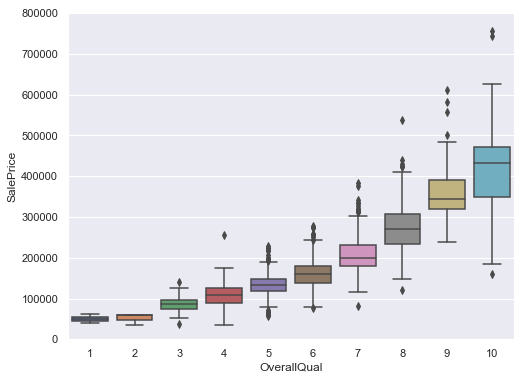

In [18]:
#OverallQual and SalePrice
overall_qual = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=overall_qual)
fig.axis(ymin=0, ymax=800000)
plt.show()

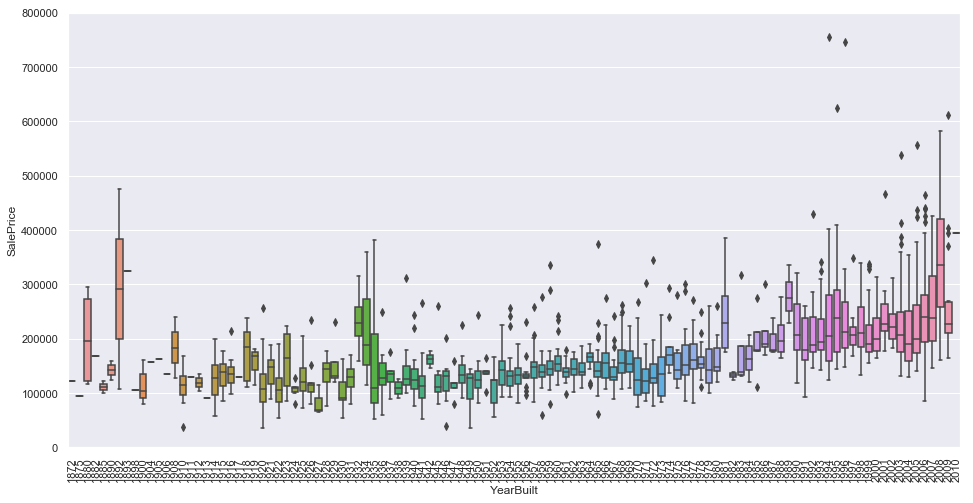

In [19]:
#YearBuilt and SalePrice
year_built = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=year_built)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

In [20]:
#data = pd.concat([train, test], keys=['train', 'test'])
# drop the data with high missing percentage
data.drop(['Id', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1, inplace=True)
# drop the Bsmt feature group, Garage feature group as well as some trivial features
data.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF', 'BsmtFullBath',
           'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'BsmtFinType2', 'Functional', 'WoodDeckSF', 'OpenPorchSF',
           'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageArea',
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)
# merge TotalBsmtSF, 1stFlrSF, 2ndFlrSF to TotalSF
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['1stFlrSF'] = data['1stFlrSF'].fillna(0)
data['2ndFlrSF'] = data['2ndFlrSF'].fillna(0)
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
# MSSubClass as categorical
data['MSSubClass'] = data['MSSubClass'].astype(str)
# MSZoning: filling NA with most popular values
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
# LotFrontage: fill NA with mean value
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
# OverallCond as categorical
data['OverallCond'] = data['OverallCond'].astype(str)
# Electrical: fill NA with most popular values
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
# KitchenAbvGr as categorical
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype(str)
# KitchenQual: fill NA with most popular values
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
# GarageCars: fill NA with 0
data['GarageCars'] = data['GarageCars'].fillna(0.0)
# SaleType: fill NA with most popular values
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
# Year and Month as categorical
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
# Exterior1st and Exterior2nd: fill NA with most popular values
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior2nd'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
# Standardizing LotFrontage and LotArea
numeric_data = data.loc[:, ['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_data_standardized = (numeric_data - numeric_data.mean())/numeric_data.std()
# Log transformation of labels, GrLivArea and TotalSF
train_labels = np.log(train_labels)
data['GrLivArea'] = np.log(data['GrLivArea'])
data['TotalSF'] = np.log(data['TotalSF'])
#Getting Dummies from Condition1 and Condition2
conditions = set([x for x in data['Condition1']] + [x for x in data['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(data.index), len(conditions))), index=data.index, columns=conditions)
for i, cond in enumerate(zip(data['Condition1'], data['Condition2'])):
    dummies.ix[i, cond] = 1
data = pd.concat([data, dummies.add_prefix('Condition_')], axis=1)
data.drop(['Condition1', 'Condition2'], axis=1, inplace=True)
# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in data['Exterior1st']] + [x for x in data['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(data.index), len(exteriors))), index=data.index, columns=exteriors)
for i, ext in enumerate(zip(data['Exterior1st'], data['Exterior2nd'])):
    dummies.ix[i, ext] = 1
data = pd.concat([data, dummies.add_prefix('Exterior_')], axis=1)
data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)
# Getting Dummies from all other categorical vars
for col in data.dtypes[data.dtypes == 'object'].index:
    for_dummy = data.pop(col)
    data = pd.concat([data, pd.get_dummies(for_dummy, prefix=col)], axis=1)
# copy data
data_standardized = data.copy()
# Replacing numeric feature by standardized values
data_standardized.update(numeric_data_standardized)
# Splitting dataset to train and test
train_data = data.loc['train'].select_dtypes(include=[np.number]).values
test_data = data.loc['test'].select_dtypes(include=[np.number]).values
# Splitting standardized features
train_data_st = data_standardized.loc['train'].select_dtypes(include=[np.number]).values
test_data_st = data_standardized.loc['test'].select_dtypes(include=[np.number]).values

In [37]:
# Implementing Linear Regression Model
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(train_data_st,train_labels)
y_pred1=regr.predict(train_data_st)

In [38]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(train_labels, y_pred1))

0.11918437976674094

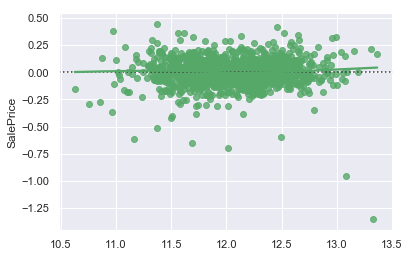

In [39]:
sns.residplot(y_pred1,train_labels , lowess=True, color="g")

In [47]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(train_data_st)
model=linear_model.LinearRegression()
model.fit(x_poly,train_labels)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(metrics.mean_squared_error(train_labels,y_poly_pred))

In [48]:
rmse

0.0010584930399280157

# Polynomial regression(degree=2) gives less Root Mean Squared Error than linear regression.
# Hence will use Polynomial Regreession to predict the response variable of test data.

In [54]:
x1_poly = poly.fit_transform(test_data_st)
y1_poly_pred = model.predict(x1_poly)


In [55]:
y1_poly_pred

array([11.67273481, 11.89303121, 12.21749442, ..., 11.65562134,
       11.6295833 , 12.31023677])

# BASELINE MODEL

In [56]:
from random import randrange
 
# zero rule algorithm for regression
def baseline_model(train, test):
    output_values = [row[-1] for row in train]
    prediction = sum(output_values) / float(len(output_values))
    predicted = [prediction for i in range(len(test))]
    return predicted